#Análisis Descriptivo de Accidentes de Tránsito – Bogotá 2023

## Librerias

In [90]:
import pandas as pd # Librería principal para la manipulación y análisis de datos estructurados (DataFrames)
import numpy as np  # Librería para realizar cálculos numéricos y manejar arreglos multidimensionales
import matplotlib.pyplot as plt  # Librería para crear visualizaciones gráficas (gráficos de barras, histogramas, etc.)
import seaborn as sns  # Librería para visualizaciones estadísticas avanzadas y atractivas
import plotly.express as px # librería de visualización de datos que permite crear gráficos interactivos de forma rápida y sencilla a partir de DataFrames.
import scipy.stats as stats # Proporciona herramientas estadísticas avanzadas (pruebas de normalidad, correlación, etc.)
from statsmodels.tsa.seasonal import seasonal_decompose # se utiliza para descomponer una serie temporal en sus componentes básicos
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Para graficar funciones de autocorrelación y autocorrelación parcial

##1. Introducción

El presente análisis descriptivo tiene como objetivo caracterizar de manera integral los accidentes de tránsito ocurridos en Bogotá durante el año 2023, a partir de la información oficial suministrada por la Secretaría de Movilidad.

El propósito principal es identificar los principales factores asociados a la ocurrencia de accidentes mediante el estudio estadístico de sus características temporales, espaciales y demográficas. Para ello, se examinan las variables relacionadas con el tipo de siniestro, las condiciones de los actores viales, la distribución geográfica y el comportamiento temporal de los eventos registrados.

El análisis se desarrolla utilizando los datasets generados en la fase de tratamiento y preparación de datos (ETL), los cuales incluyen:

- Un dataset transaccional limpio que contiene la información consolidada a nivel de registro individual.
- Una tabla agregada por fecha y localidad, que permite evaluar patrones espaciales y temporales.
- Una tabla agregada por fecha, orientada al análisis de tendencias diarias en la ciudad.

Metodológicamente, el estudio se estructura en tres enfoques complementarios:

- **Análisis distribucional**, aplicado a variables categóricas para identificar frecuencias y proporciones.
- **Análisis comparativo y estadístico descriptivo**, aplicado a variables numéricas mediante medidas de tendencia central y dispersión.
- **Análisis descriptivo temporal**, enfocado en la evolución diaria de los accidentes y la identificación de patrones semanales o concentraciones específicas.

Este enfoque integral permite obtener una visión estructurada del fenómeno, facilitando la identificación de comportamientos recurrentes y posibles factores asociados a la siniestralidad vial en la ciudad.

##2. Carga de datasets procesados

In [91]:
#importacion de datos

# Rutas
ruta_set_general="https://raw.githubusercontent.com/Josemena95/data-portfolio/refs/heads/main/etl-traffic-accidents-bogota-2023/data/processed/accidentes_bogota_2023_dataset_limpio.csv"
ruta_set_localidad_fecha_agg="https://raw.githubusercontent.com/Josemena95/data-portfolio/refs/heads/main/etl-traffic-accidents-bogota-2023/data/processed/accidentes_bogota_2023_localidad_fecha_agregado.csv"
ruta_set_fecha_agg="https://raw.githubusercontent.com/Josemena95/data-portfolio/refs/heads/main/etl-traffic-accidents-bogota-2023/data/processed/accidentes_bogota_2023_agg_fecha.csv"

#dataframes

df_general=pd.read_csv(ruta_set_general)
df_localidad_fecha_agg=pd.read_csv(ruta_set_localidad_fecha_agg)
df_fecha_agg=pd.read_csv(ruta_set_fecha_agg)



##3. Análisis descriptivo de variables categóricas

### 3.1 Variables estratégicas

#### Localidad

In [92]:
#funcion tabla_frecuencias
def tabla_frecuencias(df, columna):
    frecuencias = df[columna].value_counts()
    proporciones = df[columna].value_counts(normalize=True)*100
    Tabla_localidad = pd.DataFrame({'Frecuencia': frecuencias, 'Proporción(%)': proporciones})
    return  Tabla_localidad

#funcion grafico de barras
def grafico_barras(df,columna):
  frecuencias = df[columna].value_counts()
  proporciones = df[columna].value_counts(normalize=True)*100
  plt.figure(figsize=(10, 5))
  plt.bar(frecuencias.index, frecuencias.values)
  plt.title(f'Frecuencia por {columna}')
  plt.xlabel(f'{columna}')
  plt.ylabel('Frecuencia')
  plt.xticks(rotation=45, ha='right')
  plt.show()


In [93]:
#Tabla de frecuencias
tabla_frecuencias(df_general,"Localidad")

,Frecuencia,Proporción(%)
Localidad,,
KENNEDY,4560,14.145237
ENGATIVA,2940,9.119955
SUBA,2768,8.586407
PUENTE ARANDA,2470,7.662003
BOSA,2437,7.559636
FONTIBON,1937,6.008624
USAQUEN,1704,5.285852
CIUDAD BOLIVAR,1594,4.944629
TEUSAQUILLO,1476,4.578590


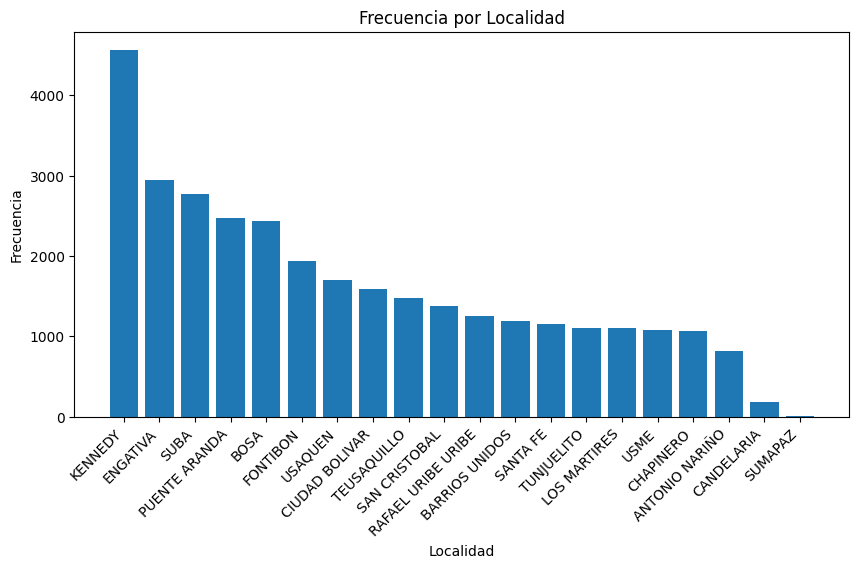

In [94]:
#Grafico de barras
grafico_barras(df_general,"Localidad")

📍 **Distribución espacial de los accidentes**

La distribución de accidentes por localidad muestra una concentración significativa en ciertas zonas de la ciudad. Kennedy lidera con el 14.1% del total de registros, seguida por Engativá (9.1%) y Suba (8.6%).

En conjunto, las cinco localidades con mayor incidencia (Kennedy, Engativá, Suba, Puente Aranda y Bosa) concentran aproximadamente el 47% de los accidentes registrados en 2023, lo que evidencia un patrón de alta concentración territorial.

Este comportamiento sugiere que la siniestralidad no se distribuye de manera homogénea en la ciudad, sino que se agrupa en localidades con alta densidad poblacional y elevado flujo vehicular. Esto puede estar asociado a factores como mayor actividad económica, intersecciones de alto tráfico y presión sobre la infraestructura vial.

En contraste, localidades como Sumapaz presentan una participación marginal (0.01%), coherente con su baja densidad urbana y menor circulación vehicular.

Desde una perspectiva analítica, este patrón de concentración espacial es relevante para la priorización de intervenciones en seguridad vial, ya que permite identificar zonas críticas donde podrían focalizarse estrategias preventivas.


####Tipo de Accidente (Clase_Acc)

In [95]:
#Tabla de frecuencias
tabla_frecuencias(df_general,"Clase_Acc")

,Frecuencia,Proporción(%)
Clase_Acc,,
Choque,23866,74.032944
Atropello,5774,17.911096
Caida de ocupante,1699,5.270342
Otros,898,2.785619


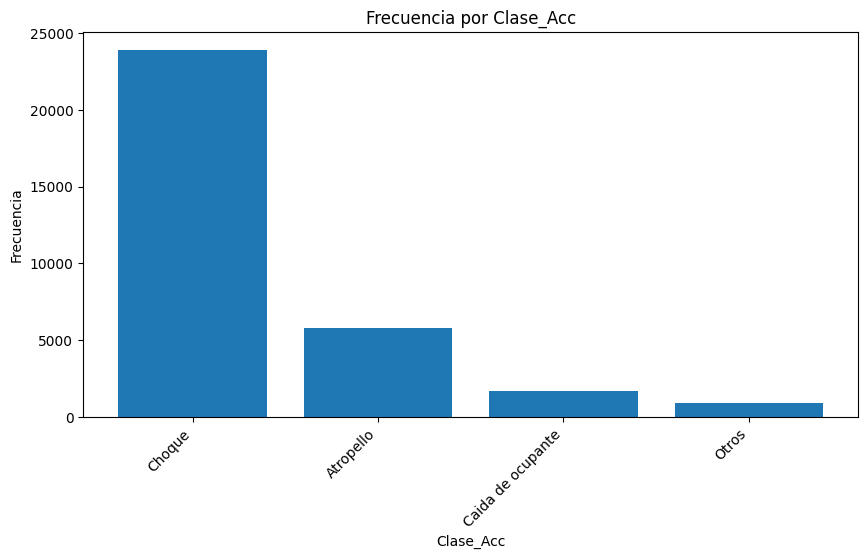

In [96]:
# Crear el gráfico de barras.
grafico_barras(df_general,"Clase_Acc")

🚗 **Distribución por tipo de accidente**

La tipología de los accidentes muestra una marcada concentración en eventos tipo choque, que representan el 74% del total de registros. En segundo lugar se encuentran los atropellos con un 17.9%, mientras que las caídas de ocupante corresponden al 5.3%.

Al agrupar los choques y las caídas de ocupante, se observa que aproximadamente el 79% de los accidentes están directamente asociados a la dinámica vehicular, lo que evidencia que la mayor parte de la siniestralidad está relacionada con interacciones entre vehículos o pérdida de control durante la conducción.

Por otro lado, la proporción de atropellos no es marginal. Casi uno de cada cinco accidentes involucra peatones, lo que sugiere una exposición significativa de actores viales vulnerables dentro del entorno urbano.

Desde una perspectiva analítica, la distribución evidencia que la seguridad vial en 2023 estuvo predominantemente asociada a eventos de colisión, pero con una participación relevante de incidentes que afectan a peatones, lo cual resulta crítico para el diseño de estrategias diferenciadas de prevención.

#### Clasificación horaria (clasificacion_Horario)

In [97]:
#Tabla de frecuencias
tabla_frecuencias(df_general,"clasificacion_Horario")

,Frecuencia,Proporción(%)
clasificacion_Horario,,
Mañana,10026,31.100909
Tarde,9615,29.825976
Noche,8717,27.040357
Madrugada,3879,12.032757


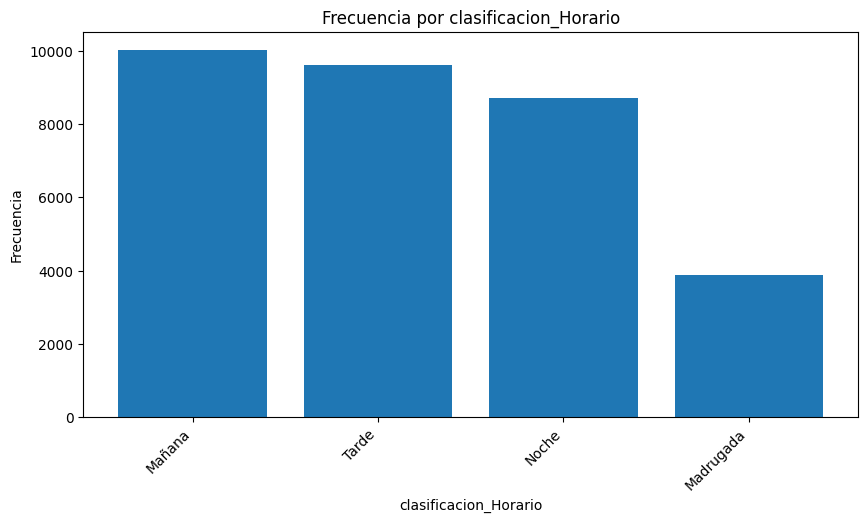

In [98]:
# Crear el gráfico de barras.
grafico_barras(df_general,"clasificacion_Horario")

⏰ **Distribución por clasificación horaria**

La distribución de accidentes por franja horaria muestra un comportamiento relativamente homogéneo entre mañana (31.1%), tarde (29.8%) y noche (27.0%), con diferencias menores al 4% entre estas categorías.

Este patrón indica que la siniestralidad no se concentra exclusivamente en un único periodo del día, sino que se mantiene de manera consistente a lo largo de las principales jornadas de actividad urbana.

En contraste, la madrugada presenta una reducción significativa (12.0%), lo que evidencia una menor incidencia relativa en esta franja horaria. Sin embargo, el hecho de que la noche mantenga niveles cercanos a la mañana y la tarde sugiere que el riesgo no disminuye proporcionalmente al paso del día.

Desde una perspectiva analítica, la distribución sugiere que la ocurrencia de accidentes está asociada a la actividad constante del sistema vial urbano, más que a un único periodo crítico claramente dominante.

####Condición

In [99]:
#Tabla de frecuencias
tabla_frecuencias(df_general,"Condicion")

,Frecuencia,Proporción(%)
Condicion,,
CONDUCTOR,11569,35.887334
MOTOCICLISTA,9520,29.531284
PASAJERO,5779,17.926606
PEATÓN,3187,9.886156
CICLISTA,2182,6.768620


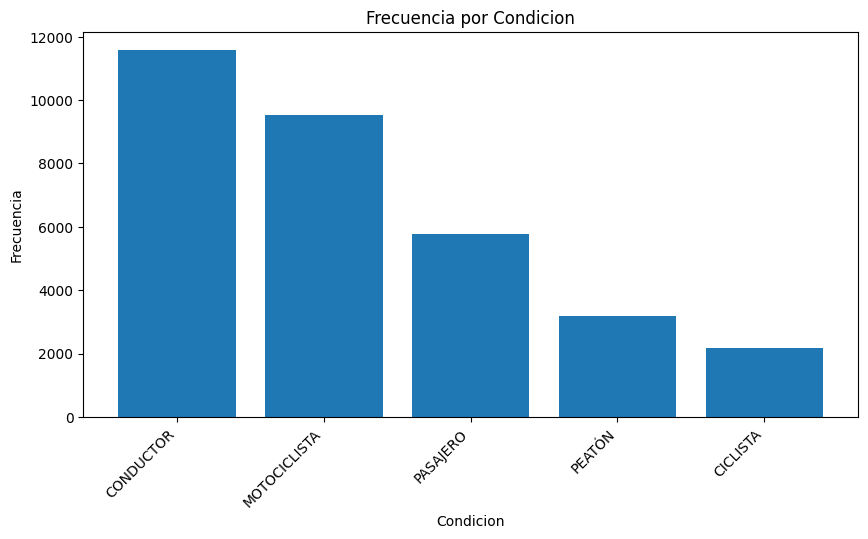

In [100]:
# Crear el gráfico de barras.
grafico_barras(df_general,"Condicion")

👥 **Distribución por condición del actor vial**

La variable “Condición” evidencia que los conductores representan el 35.9% de los involucrados en siniestros, seguidos por motociclistas con el 29.5%. En conjunto, ambos grupos concentran aproximadamente el 65% del total de registros.

Si se incluyen los pasajeros (17.9%), se observa que más del 83% de las personas involucradas en accidentes están asociadas a vehículos motorizados, lo que refleja la centralidad del tráfico automotor en la dinámica de siniestralidad urbana.

Por su parte, los peatones (9.9%) y ciclistas (6.8%) representan en conjunto el 16.6% de los casos. Aunque su participación es menor en términos relativos, estos grupos corresponden a actores viales vulnerables, lo que resulta relevante desde una perspectiva de seguridad vial.

La diferencia de aproximadamente 3 puntos porcentuales entre peatones y ciclistas sugiere una mayor exposición relativa de peatones en eventos de tránsito durante 2023.

Desde un enfoque analítico, la distribución confirma que la mayor carga de siniestralidad recae sobre la interacción entre vehículos motorizados, aunque una proporción no despreciable involucra actores con menor protección física.

####Sexo

In [101]:
#Tabla de frecuencias
tabla_frecuencias(df_general,"Sexo")

,Frecuencia,Proporción(%)
Sexo,,
Masculino,23828,73.915067
Femenino,8409,26.084933


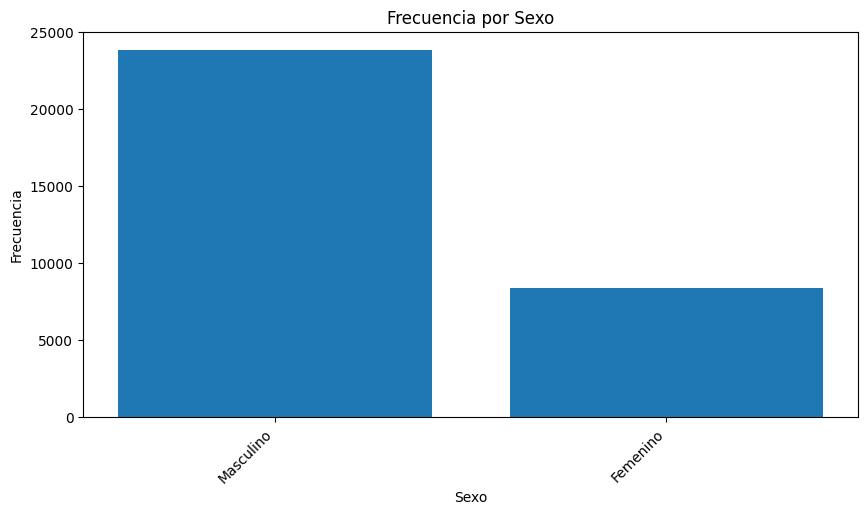

In [102]:
# Crear el gráfico de barras.
grafico_barras(df_general,"Sexo")

👤 **Distribución por sexo**

La distribución por sexo evidencia una marcada predominancia masculina en los registros de siniestros viales. El 73.9% de las personas involucradas corresponde a hombres, mientras que el 26.1% corresponde a mujeres.

Esta diferencia sugiere una mayor participación masculina en eventos de tránsito durante 2023. No obstante, es importante señalar que esta variable refleja personas involucradas y no necesariamente responsables del accidente.

Desde una perspectiva analítica, esta brecha podría estar asociada a factores estructurales como mayor exposición al tránsito, diferencias en patrones de movilidad o mayor participación masculina en la conducción de ciertos tipos de vehículos. Sin embargo, para establecer conclusiones más robustas sería necesario contrastar estos resultados con datos de participación modal o tasas por población.

####Gravedad de accidente(Gravedad_Indicador_Tradicional_y)

In [103]:
#Tabla de frecuencias
tabla_frecuencias(df_general,"Gravedad_Indicador_Tradicional_y")

,Frecuencia,Proporción(%)
Gravedad_Indicador_Tradicional_y,,
HERIDO,22734,70.521451
ILESO,8962,27.800354
MUERTO,541,1.678196


In [104]:
#Tabla de frecuencias
frecuencias = df_general['Gravedad_Indicador_Tradicional_y'].value_counts()
proporciones = df_general['Gravedad_Indicador_Tradicional_y'].value_counts(normalize=True)*100
Tabla_localidad = pd.DataFrame({'Frecuencia': frecuencias, 'Proporción(%)': proporciones})
Tabla_localidad


,Frecuencia,Proporción(%)
Gravedad_Indicador_Tradicional_y,,
HERIDO,22734,70.521451
ILESO,8962,27.800354
MUERTO,541,1.678196


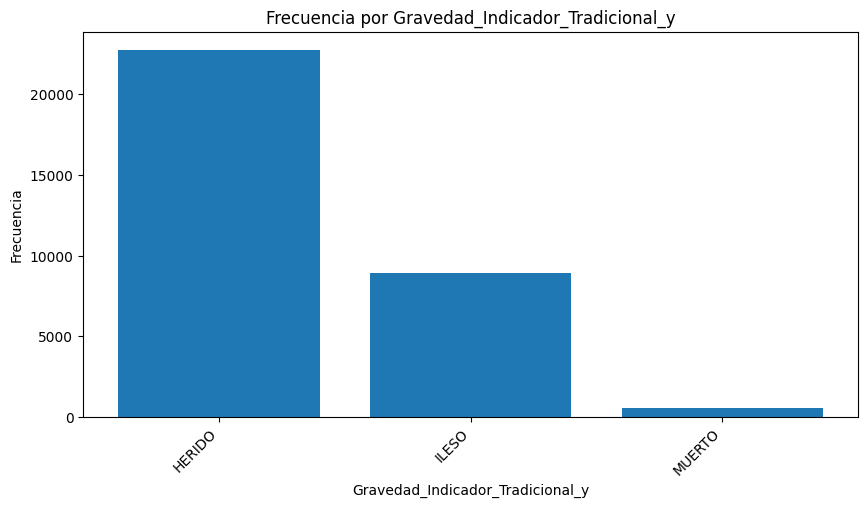

In [105]:
# Crear el gráfico de barras.
grafico_barras(df_general,"Gravedad_Indicador_Tradicional_y")

⚠ **Distribución por gravedad del accidente**

La variable de gravedad evidencia que el 70.5% de los involucrados resultaron heridos, mientras que el 27.8% no presentaron lesiones. Los casos fatales representan el 1.68% del total de registros.

Este patrón indica que La mayoría de las personas involucradas resultaron heridas, lo que refleja un impacto significativo en términos de salud pública. Aunque la proporción de eventos fatales es baja en términos relativos, el número absoluto de fallecimientos (541 casos) no es despreciable y representa una carga importante desde una perspectiva social y sanitaria.

La distribución presenta un desbalance marcado hacia eventos no fatales, lo cual es relevante metodológicamente si se plantea un análisis predictivo posterior, ya que la clase “MUERTO” tendría baja representación relativa.

Desde un enfoque analítico, los resultados sugieren que la siniestralidad vial en 2023 estuvo caracterizada principalmente por eventos con lesiones, más que por eventos sin afectación o con desenlace fatal.

###3.2 Análisis general de variables categóricas secundarias

Para complementar el análisis, se evaluaron las restantes variables categóricas mediante visualización automática de frecuencias.

In [106]:
categoricas_restantes=["Con_Bicicleta","Con_Carga","Con_Embriaguez","Con_Huecos","Con_Menores","Con_Moto","Con_Peaton","Con_Persona_Mayor","Con_Velocidad","Con_Trans_Public","Vehiculo_Viajaba_Clasificado","Muerte_Posterior"]


------------------------------------------------------------------------------------------------------------------------
                                                Variable: Con_Bicicleta                                                 
------------------------------------------------------------------------------------------------------------------------


,Frecuencia,Proporción(%)
Con_Bicicleta,,
NO,27706,85.944722
SI,4531,14.055278


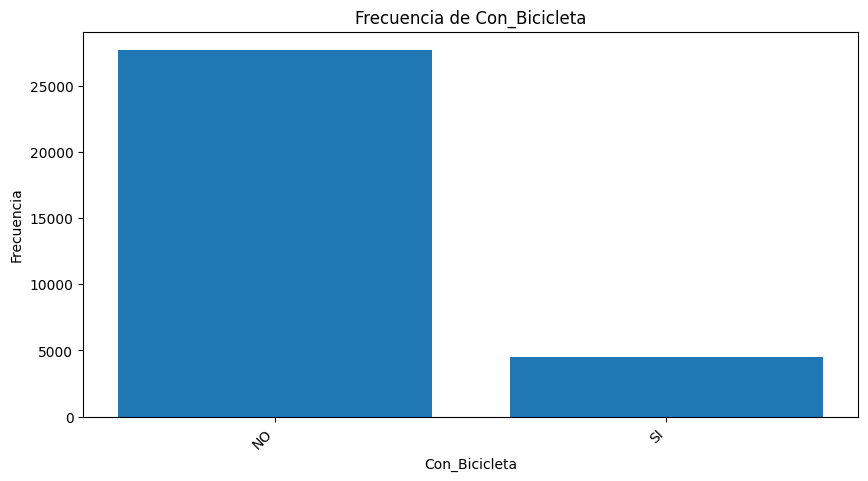



------------------------------------------------------------------------------------------------------------------------
                                                  Variable: Con_Carga                                                   
------------------------------------------------------------------------------------------------------------------------


,Frecuencia,Proporción(%)
Con_Carga,,
NO,30188,93.643949
SI,2049,6.356051


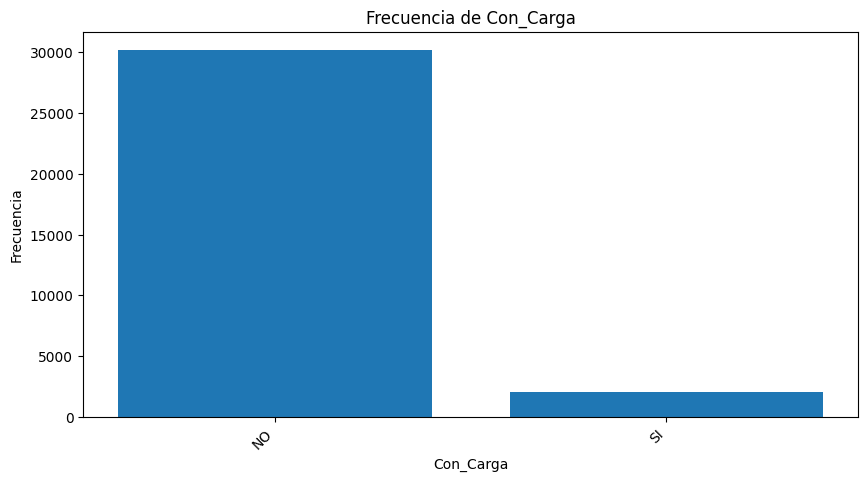



------------------------------------------------------------------------------------------------------------------------
                                                Variable: Con_Embriaguez                                                
------------------------------------------------------------------------------------------------------------------------


,Frecuencia,Proporción(%)
Con_Embriaguez,,
NO,31103,96.482303
SI,1134,3.517697


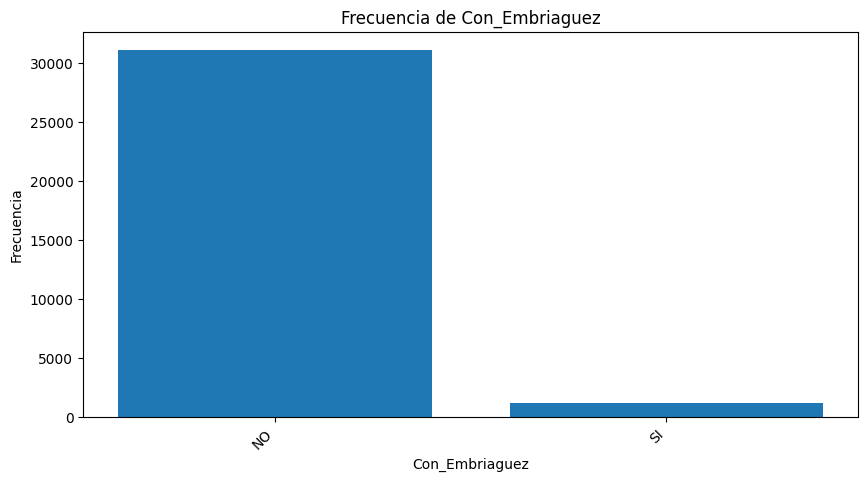



------------------------------------------------------------------------------------------------------------------------
                                                  Variable: Con_Huecos                                                  
------------------------------------------------------------------------------------------------------------------------


,Frecuencia,Proporción(%)
Con_Huecos,,
NO,31901,98.957719
SI,336,1.042281


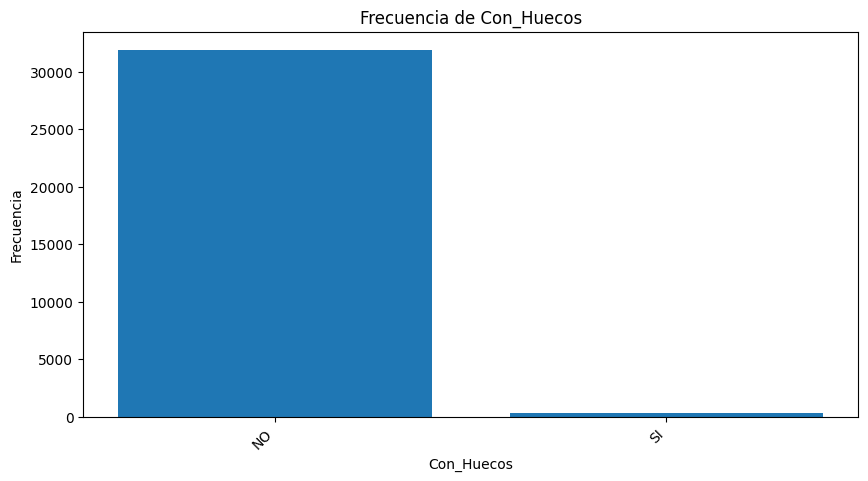



------------------------------------------------------------------------------------------------------------------------
                                                 Variable: Con_Menores                                                  
------------------------------------------------------------------------------------------------------------------------


,Frecuencia,Proporción(%)
Con_Menores,,
NO,28315,87.833856
SI,3922,12.166144


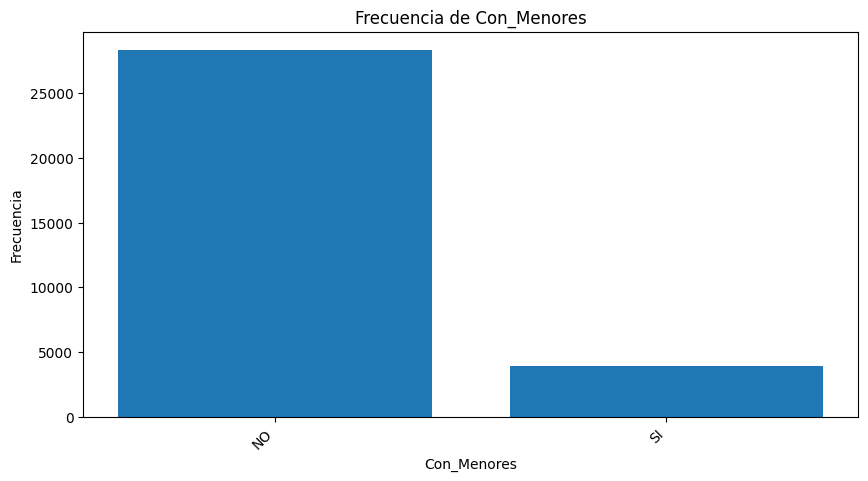



------------------------------------------------------------------------------------------------------------------------
                                                   Variable: Con_Moto                                                   
------------------------------------------------------------------------------------------------------------------------


,Frecuencia,Proporción(%)
Con_Moto,,
SI,19543,60.622887
NO,12694,39.377113


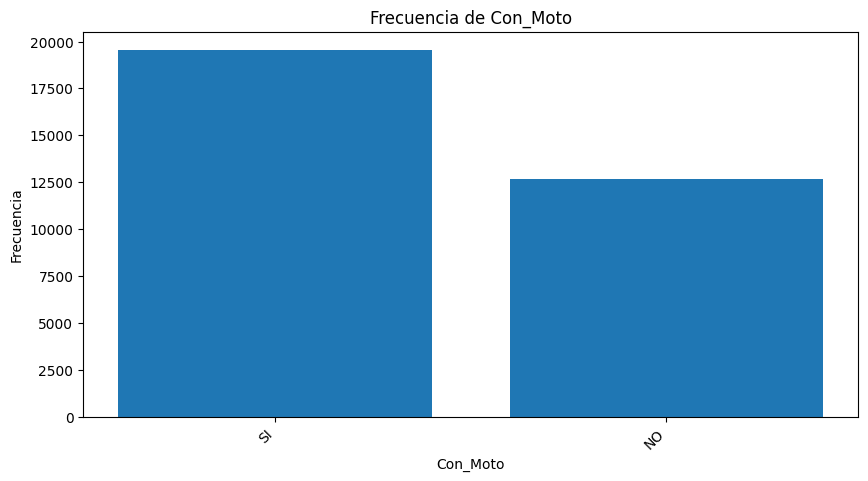



------------------------------------------------------------------------------------------------------------------------
                                                  Variable: Con_Peaton                                                  
------------------------------------------------------------------------------------------------------------------------


,Frecuencia,Proporción(%)
Con_Peaton,,
NO,25990,80.621646
SI,6247,19.378354


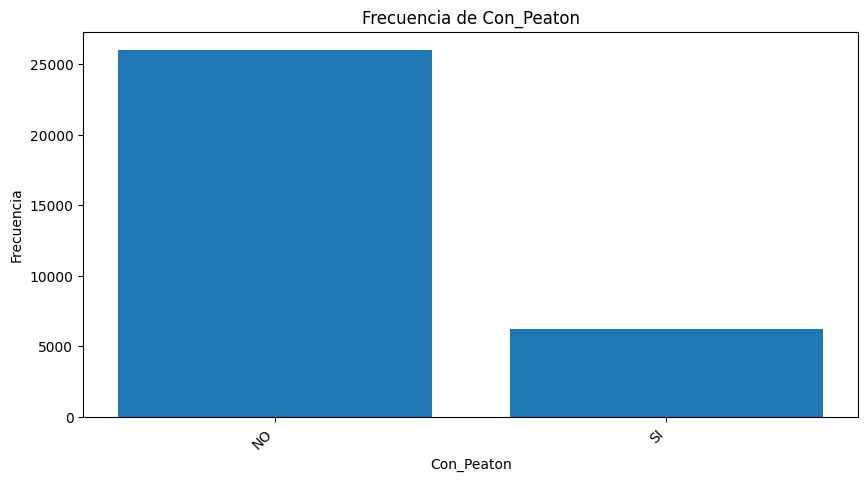



------------------------------------------------------------------------------------------------------------------------
                                              Variable: Con_Persona_Mayor                                               
------------------------------------------------------------------------------------------------------------------------


,Frecuencia,Proporción(%)
Con_Persona_Mayor,,
NO,25297,78.471942
SI,6940,21.528058


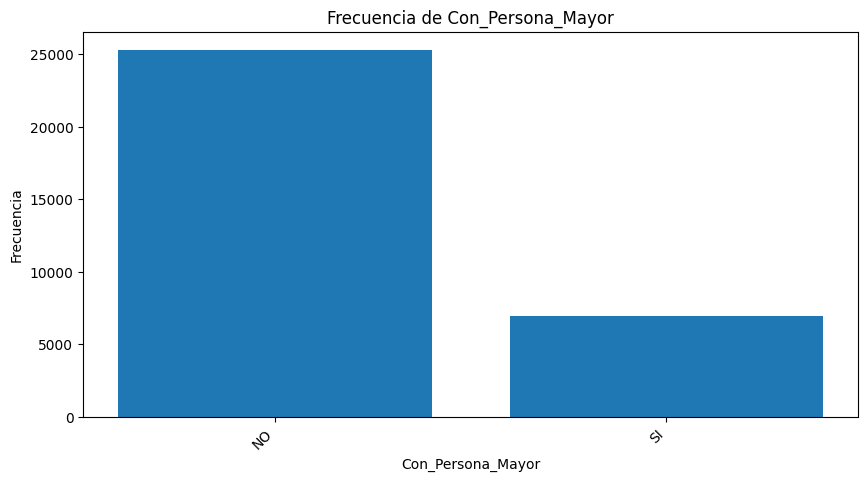



------------------------------------------------------------------------------------------------------------------------
                                                Variable: Con_Velocidad                                                 
------------------------------------------------------------------------------------------------------------------------


,Frecuencia,Proporción(%)
Con_Velocidad,,
NO,32050,99.419921
SI,187,0.580079


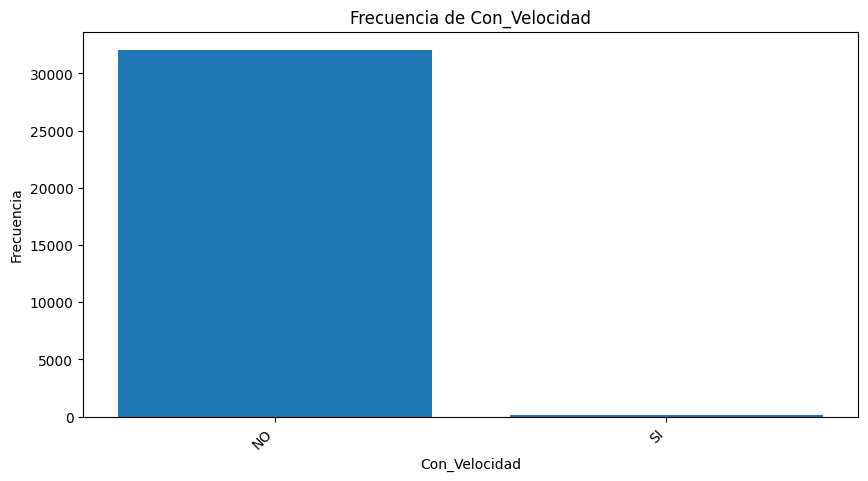



------------------------------------------------------------------------------------------------------------------------
                                               Variable: Con_Trans_Public                                               
------------------------------------------------------------------------------------------------------------------------


,Frecuencia,Proporción(%)
Con_Trans_Public,,
NO,21677,67.242609
SI,10560,32.757391


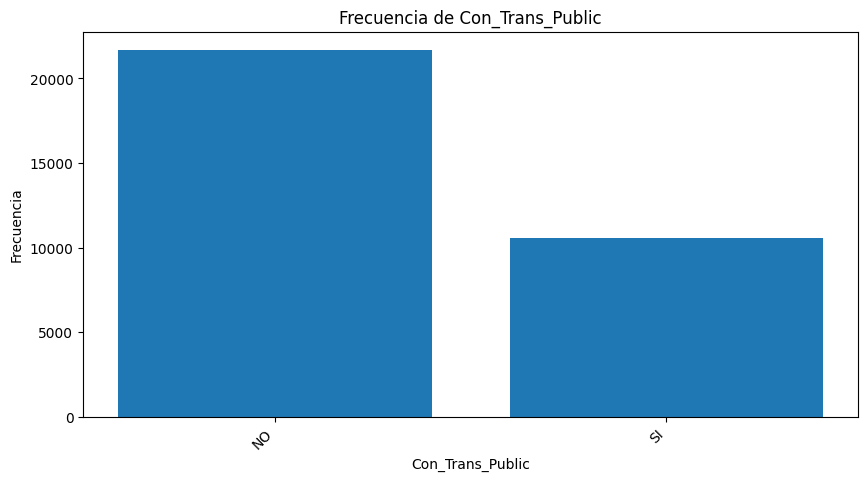



------------------------------------------------------------------------------------------------------------------------
                                         Variable: Vehiculo_Viajaba_Clasificado                                         
------------------------------------------------------------------------------------------------------------------------


,Frecuencia,Proporción(%)
Vehiculo_Viajaba_Clasificado,,
MOTOCICLETA,13423,41.638490
LIVIANO,8412,26.094240
TRANSPORTE PUBLICO,4643,14.402705
TAXI,2388,7.407637
BICICLETA,2354,7.302168
CARGA,1017,3.154760


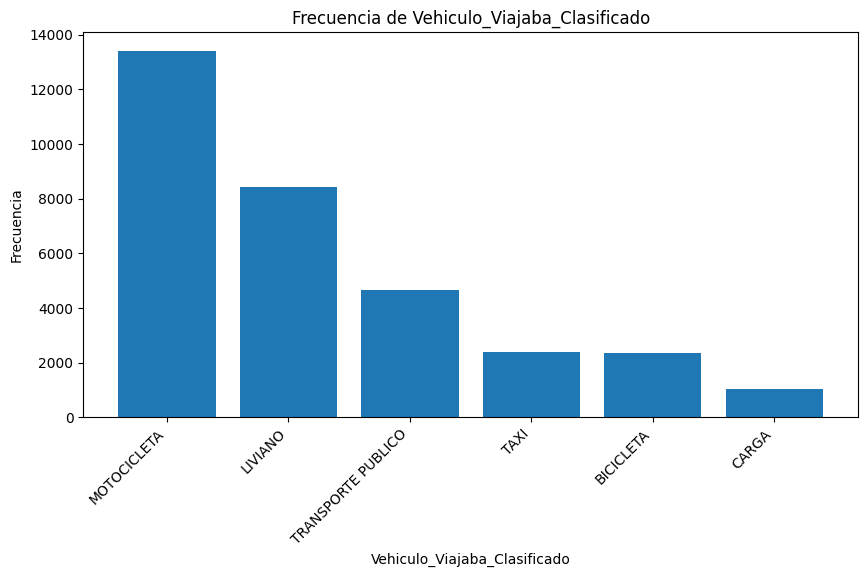



------------------------------------------------------------------------------------------------------------------------
                                               Variable: Muerte_Posterior                                               
------------------------------------------------------------------------------------------------------------------------


,Frecuencia,Proporción(%)
Muerte_Posterior,,
N,32031,99.360983
S,206,0.639017


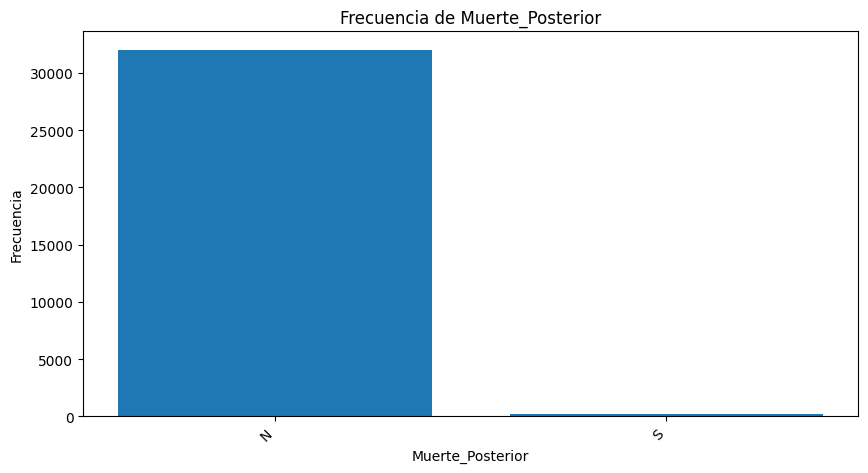

In [107]:
from IPython.display import display

ancho=120

for columna in categoricas_restantes:

  titulo=f"Variable: {columna}"
  print("-"*ancho)
  print(titulo.center(ancho))
  print("-"*ancho)
  # Tabla de frecuencias
  frecuencias = df_general[columna].value_counts()
  proporciones = df_general[columna].value_counts(normalize=True)*100
  Tabla_localidad = pd.DataFrame({'Frecuencia': frecuencias, 'Proporción(%)': proporciones})
  display(Tabla_localidad)

  #crear el grafico de barras.
  plt.figure(figsize=(10, 5))
  plt.bar(frecuencias.index, frecuencias.values)
  plt.title(f'Frecuencia de {columna}')
  plt.xlabel(columna)
  plt.ylabel('Frecuencia')
  plt.xticks(rotation=45, ha='right')
  plt.show()
  print("\n")
















🔍 **Factores asociados y variables complementarias**

El análisis de las variables binarias asociadas a los accidentes permite identificar patrones relevantes. Entre los factores con mayor incidencia destaca la presencia de motocicletas (Con_Moto: 60.6%), lo que refuerza el hallazgo previo sobre la alta participación de este tipo de actor vial en la siniestralidad urbana.

También se observa una participación significativa del transporte público (32.7%) y de peatones involucrados (19.3%), lo que evidencia la interacción constante entre distintos modos de transporte dentro del sistema vial.

En contraste, variables como exceso de velocidad (0.58%), huecos en la vía (1.04%) y embriaguez (3.5%) presentan una baja proporción relativa en los registros, lo que podría indicar subregistro o menor frecuencia documentada de estos factores dentro de la base analizada.

Respecto al tipo de vehículo clasificado, las motocicletas representan el 41.6% de los vehículos involucrados, seguidas por vehículos livianos (26.1%) y transporte público (14.4%), confirmando nuevamente la centralidad del tráfico motorizado en los eventos registrados.

Finalmente, la variable de muerte posterior muestra una proporción baja (0.63%), coherente con la distribución previamente observada en la variable de gravedad.

En conjunto, estas variables complementarias refuerzan la idea de que la siniestralidad en 2023 estuvo predominantemente asociada a la dinámica de vehículos motorizados, con menor incidencia relativa de factores como infraestructura vial o condiciones extraordinarias registradas.

##4. Análisis descriptivo de variables numéricas

###4.1 Medidas de Tendencia Central

In [108]:
Media=df_general["Edad"].mean()
Mediana=df_general["Edad"].median()
Moda=df_general["Edad"].mode()[0]


Medidas_de_tendencia_central=pd.DataFrame({"Valor":[Media,Mediana,Moda]},index=["Media","Mediana","Moda"])
Medidas_de_tendencia_central



,Valor
Media,36.138723
Mediana,32.000000
Moda,23.000000


**Medidas de tendencia central**

El análisis de las medidas de tendencia central muestra que la media (36.1 años) es mayor que la mediana (32 años), lo que evidencia una asimetría positiva en la distribución de la edad. La moda se ubica en 23 años, indicando que esta es la edad más frecuente entre las personas involucradas en accidentes de tránsito.

###4.2 Medidas de Dispersión

In [109]:
Rango = df_general["Edad"].max() - df_general["Edad"].min()
Q1 = df_general["Edad"].quantile(0.25)
Q3 = df_general["Edad"].quantile(0.75)
IQR = Q3 - Q1
Varianza = df_general["Edad"].var()
Desviacion_Estandar = df_general["Edad"].std()
Medidas_de_dispersión=pd.DataFrame({"Valor":[Rango,Q1,Q3,IQR,Varianza,Desviacion_Estandar]},index=["Rango","Q1","Q3","IQR","Varianza","Desviacion Estandar"])
Medidas_de_dispersión

,Valor
Rango,112.000000
Q1,25.000000
Q3,46.000000
IQR,21.000000
Varianza,241.762242
Desviacion Estandar,15.548705


**Medidas de dispersión**

Las medidas de dispersión revelan que, aunque el rango total es amplio (112 años), el 50% central de los casos se concentra entre los 25 y 46 años (IQR = 21), lo que confirma que la mayor incidencia de accidentes se presenta en población joven-adulta. La desviación estándar de 15.5 años sugiere una variabilidad moderada en las edades registradas.

En conjunto, estos resultados indican que la siniestralidad vial afecta predominantemente a personas jóvenes, con una dispersión moderada y una distribución sesgada hacia edades mayores debido a la presencia de individuos de mayor edad en menor proporción.

###4.3 Identificación de Valores Atípicos

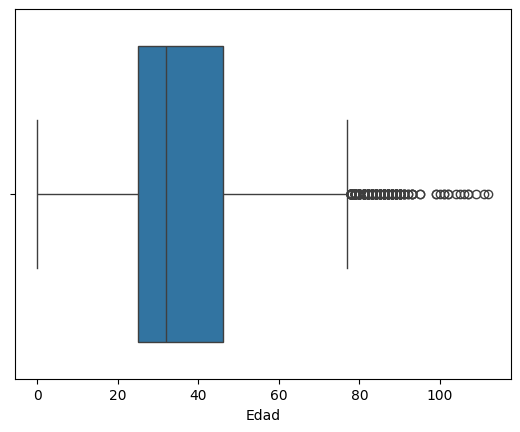

In [110]:
# Crear un boxplot.
df_general['Edad']
sns.boxplot(x=df_general['Edad'])
# Mostrar el gráfico.
plt.show()

In [111]:
# Calcular límites para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar outliers
outliers = df_general[(df_general['Edad'] < lower_bound) | (df_general['Edad'] > upper_bound)]
outliers_list = outliers['Edad'].tolist()
print(sorted(outliers_list))
numero_outlierts=len(outliers_list)
# Aunque hay presencia de valores atípicos, no hay valores fuera de lo normal en cuanto a la edad.
print(f"El numero de valores atípicos es: {numero_outlierts}")


[78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.

**Analisis de Valores atipicos**

El diagrama de caja muestra que la mediana de edad de las personas involucradas en accidentes de tránsito se sitúa alrededor de los 30 años, lo que indica que al menos el 50% de los individuos accidentados son menores a esta edad.

La mayor concentración de casos se encuentra aproximadamente entre los 25 y 46 años, evidenciando que la población joven-adulta es la más afectada.

Aunque se identificaron 403 valores atípicos bajo el criterio del rango intercuartílico (IQR), estos corresponden a edades plausibles dentro del ciclo vital humano, por lo que no representan errores evidentes de registro.

###4.4 Análisis de la Distribución

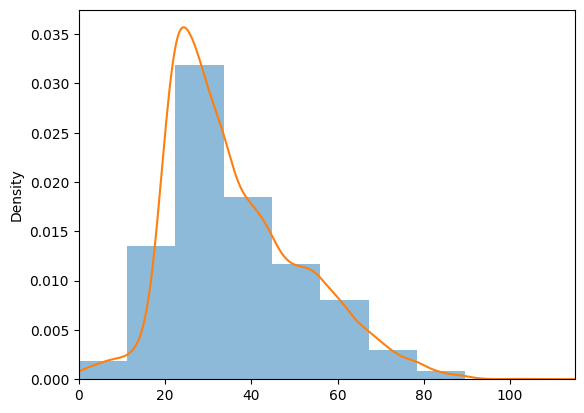

In [112]:
# Histograma de frecuencias para edad
ax = df_general['Edad'].plot.hist(density=True, xlim=[0,115], bins=10, alpha=0.5)
df_general['Edad'].plot.density(ax=ax)
plt.show()

**Distribución**

El histograma revela una distribución asimétrica positiva (sesgo a la derecha), indicando una mayor concentración de personas jóvenes en comparación con adultos mayores.

###4.5 Evaluación de Normalidad

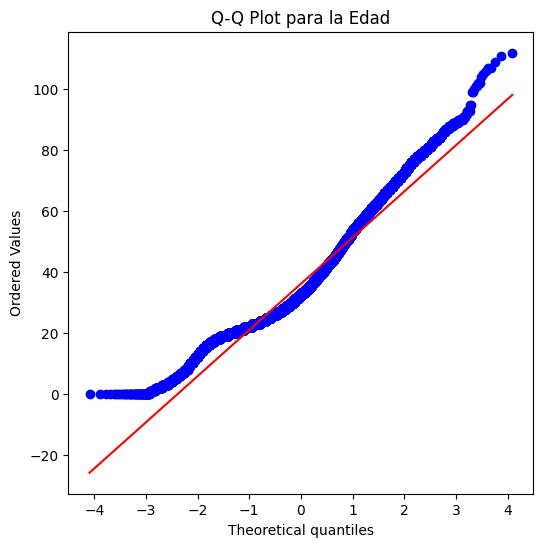

In [113]:
# Q-Q Plot para la variable 'Edad'
plt.figure(figsize=(6, 6))
stats.probplot(df_general['Edad'], dist="norm", plot=plt)
plt.title("Q-Q Plot para la Edad")
plt.show()

In [114]:
# Prueba de Shapiro-Wilk para la normalidad
shapiro_test = stats.shapiro(df_general['Edad'])
print("Prueba de Shapiro-Wilk:")
print(f"Estadístico: {shapiro_test.statistic}, p-valor: {shapiro_test.pvalue}")

# Prueba de Kolmogorov-Smirnov para la normalidad
edad_normalizada = (df_general['Edad'] - df_general['Edad'].mean()) / df_general['Edad'].std()
ks_test = stats.kstest(edad_normalizada, 'norm')
print("\nPrueba de Kolmogorov-Smirnov:")
print(f"Estadístico: {ks_test.statistic}, p-valor: {ks_test.pvalue}")

Prueba de Shapiro-Wilk:
Estadístico: 0.9502521625605057, p-valor: 1.8003941383864703e-71

Prueba de Kolmogorov-Smirnov:
Estadístico: 0.10860463052628905, p-valor: 0.0


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 32237.
  res = hypotest_fun_out(*samples, **kwds)


**Normalidad**

El gráfico Q-Q muestra desviaciones notorias respecto a la línea de referencia, especialmente en los extremos, lo que sugiere que la variable no sigue una distribución normal. Este resultado es consistente con las pruebas estadísticas de Shapiro-Wilk y Kolmogorov-Smirnov, cuyos valores p inferiores a 0.05 permiten rechazar la hipótesis nula de normalidad.

Dado el tamaño muestral considerable, estas pruebas pueden ser altamente sensibles a pequeñas desviaciones, por lo que la evidencia visual refuerza la conclusión de que la edad no presenta una distribución normal.

##5. Análisis Descriptivo Temporal

###5.1 Preparación de la serie temporal

Para el análisis temporal, la variable Fecha_Acc se convierte a formato datetime y se establece como índice de la serie, permitiendo aplicar técnicas propias de series de tiempo.

In [115]:
df_fecha_agg['Fecha_Acc'] = pd.to_datetime(df_fecha_agg['Fecha_Acc'])
df_fecha_agg.set_index('Fecha_Acc', inplace=True)

###5.2 Análisis de Tendencia

Las funciones utilizadas secuencialmente para analizar la tendencia son:


*   pd.to_datetime: Convierte la columna Fecha_Acc al formato de fecha, lo que permite manejar los datos como una serie temporal.
*   set_index: Establece Fecha_Acc como índice para organizar los datos por tiempo.
rolling(window=30).mean(): Calcula un medio móvil de 30 días, que suaviza la serie y resalta la tendencia general.
* plt.plot: Se utiliza para graficar tanto los datos diarios como la media móvil en una misma figura.




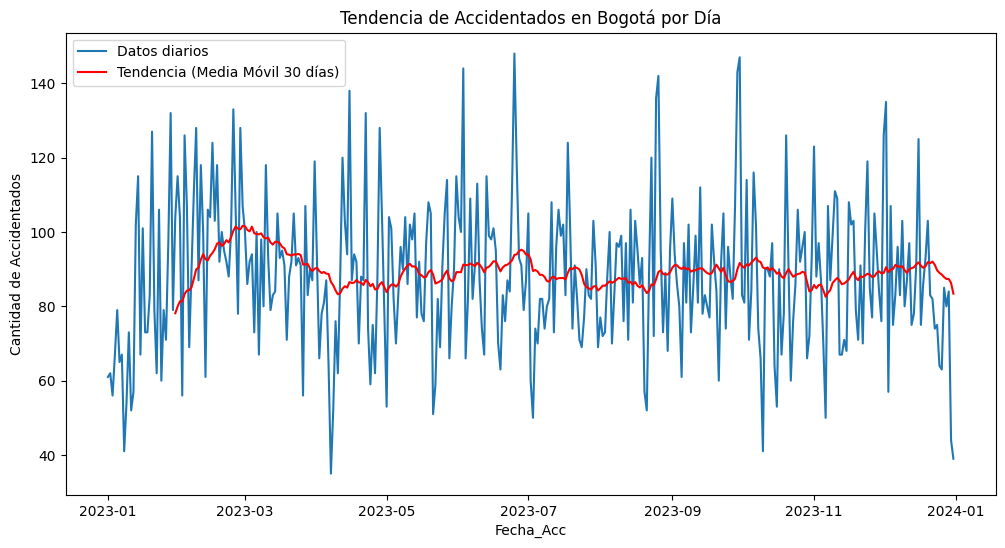

In [116]:

# Gráfico de tendencia
plt.figure(figsize=(12, 6))
plt.plot(df_fecha_agg.index, df_fecha_agg['Personas_accidentadas_por_dia'], label='Datos diarios')
plt.plot(df_fecha_agg['Personas_accidentadas_por_dia'].rolling(window=30).mean(), color='red', label='Tendencia (Media Móvil 30 días)')
plt.xlabel('Fecha_Acc')
plt.ylabel('Cantidad de Accidentados')
plt.legend()
plt.title('Tendencia de Accidentados en Bogotá por Día')
plt.show()

**Análisis de Tendencia**

La serie temporal diaria del número de personas accidentadas en Bogotá durante 2023 muestra un comportamiento relativamente estable a lo largo del año, con un incremento notable en el mes de marzo.

Al incorporar una media móvil de 30 días, se logra suavizar la variabilidad diaria y observar con mayor claridad la tendencia subyacente. Esta evidencia confirma un aumento transitorio durante marzo, seguido de una estabilización progresiva desde abril hasta finales del año.

No se observa una tendencia sostenida de crecimiento o disminución estructural en el período analizado; más bien, el comportamiento general sugiere fluctuaciones moderadas alrededor de un nivel promedio relativamente constante.

El pico observado en marzo podría estar asociado a factores coyunturales, aunque para validar dicha hipótesis sería necesario incorporar variables explicativas adicionales (por ejemplo, condiciones climáticas, volumen vehicular o eventos específicos).

### 5.3 Análisis de Estacionalidad

Las funciones utilizadas secuencialmente para analizar la estacionalidad son:


*  seasonal_decompose: Descompone la serie en componentes (tendencia, estacionalidad y ruido). Aquí se utiliza con el modelo aditivo y un período de 7 días.
*  plt.plot: Gráfica el componente estacional de la serie.






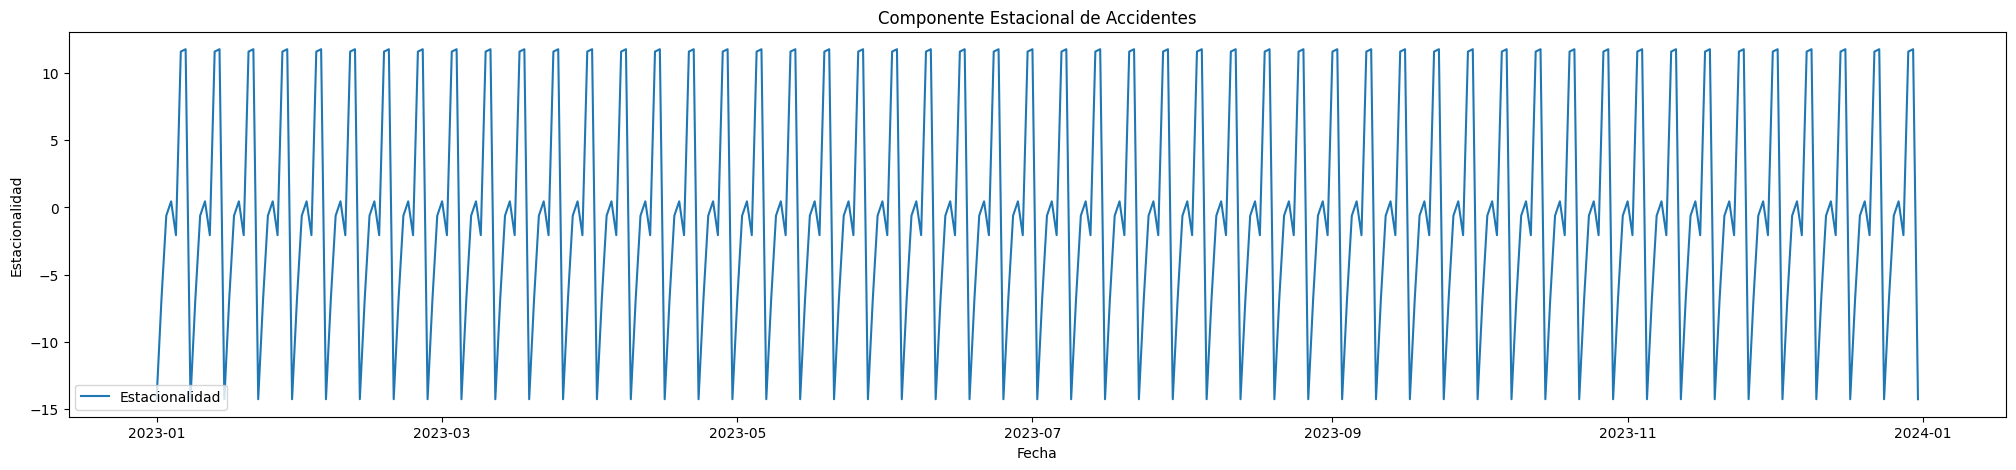

In [117]:
# Descomposición de la serie
decomposition = seasonal_decompose(df_fecha_agg['Personas_accidentadas_por_dia'], model='additive', period=7)

# Graficar solo el componente de estacionalidad
plt.figure(figsize=(25, 5))
plt.plot(decomposition.seasonal, label='Estacionalidad')
plt.title('Componente Estacional de Accidentes')
plt.xlabel('Fecha')
plt.ylabel('Estacionalidad')
plt.legend()
plt.show()

**Análisis de Estacionalidad**

El análisis de la serie temporal evidencia un patrón de estacionalidad semanal claramente definido. Al agrupar los datos por día de la semana, se observa un comportamiento recurrente en el que los viernes y sábados registran los valores más altos de personas accidentadas, mientras que los domingos presentan los niveles más bajos.

Este patrón repetitivo confirma la presencia de un componente estacional de periodicidad semanal, lo cual es consistente con dinámicas urbanas donde la distribución de la movilidad varía según el día de la semana.

La regularidad del patrón sugiere que la variabilidad observada no es aleatoria, sino que responde a ciclos temporales sistemáticos. No obstante, para atribuir el fenómeno a factores específicos (como volumen de tráfico o comportamiento social), sería necesario incorporar variables explicativas adicionales.

### 5.4 Variabilidad y Volatilidad

Las funciones utilizadas secuencialmente para analizar la Variabilidad y Volatilidad son:



*   std(): Calcula la desviación estándar de la serie, que mide cuánto se desvían los datos del promedio.
*   var(): Calcula la varianza , que es la dispersión promedio al cuadrado.



*   pct_change(): Calcula el cambio porcentual diario, utilizado para medir la volatilidad.

*  mean(): Obtiene la media del cambio porcentual (volatilidad promedio).


*   plt.plot: Gráfica los cambios porcentuales diarios.






Desviación estándar: 19.83070490027493
Varianza: 393.25685684178814
Volatilidad promedio diaria (media del cambio porcentual): 0.0390915670051128
Desviación estándar del cambio porcentual (volatilidad): 0.2981645131214315


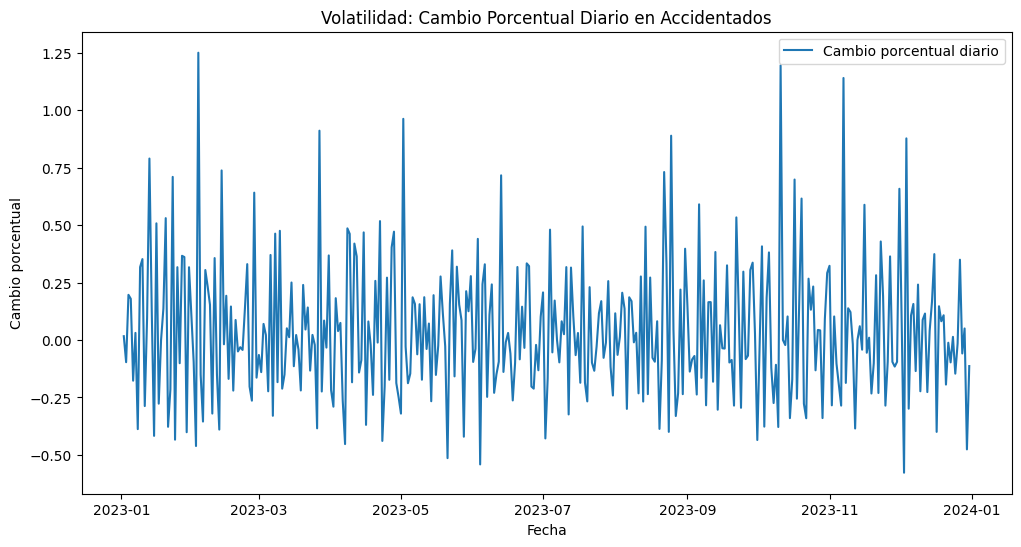

In [118]:
serie = df_fecha_agg['Personas_accidentadas_por_dia']

# 1. Calcular variabilidad con la desviación estándar y la varianza
variabilidad_std = serie.std()  # Desviación estándar
variabilidad_var = serie.var()  # Varianza

print(f"Desviación estándar: {variabilidad_std}")
print(f"Varianza: {variabilidad_var}")

# 2. Calcular la volatilidad mediante el cambio porcentual diario
volatilidad = serie.pct_change().dropna()  # Cambio porcentual diario

# Medidas de volatilidad
media_volatilidad = volatilidad.mean()  # Media del cambio porcentual
std_volatilidad = volatilidad.std()  # Desviación estándar del cambio porcentual

print(f"Volatilidad promedio diaria (media del cambio porcentual): {media_volatilidad}")
print(f"Desviación estándar del cambio porcentual (volatilidad): {std_volatilidad}")

# 3. Graficar la volatilidad
plt.figure(figsize=(12, 6))
plt.plot(volatilidad, label='Cambio porcentual diario')
plt.title('Volatilidad: Cambio Porcentual Diario en Accidentados')
plt.xlabel('Fecha')
plt.ylabel('Cambio porcentual')
plt.legend()
plt.show()

**Análisis de Variabilidad y Volatilida**

La desviación estándar de 19.83 personas indica una variabilidad considerable en el número diario de personas accidentadas respecto a la media. Este resultado, junto con una varianza de 393.26, confirma que la serie presenta una dispersión elevada y que los valores diarios no se mantienen cercanos al promedio.

El cambio porcentual promedio es ligeramente positivo, aunque su magnitud es baja frente a la desviación estándar, lo que indica que no existe evidencia clara de una tendencia porcentual sostenida. Sin embargo, la desviación estándar del cambio porcentual (29.8%) evidencia una alta volatilidad interdiaria, indicando que los incrementos o disminuciones entre días consecutivos pueden ser significativos.

En conjunto, estos resultados reflejan un comportamiento irregular en el corto plazo, con oscilaciones marcadas alrededor de la media, aunque sin necesariamente implicar una tendencia estructural sostenida.

### 5.5 Autocorrelación

Las funciones utilizadas secuencialmente para analizar la Autocorrelación son:
*   plot_acf: Genera el gráfico de autocorrelación (ACF) para identificar correlaciones entre los valores de la serie y sus rezagos.
*  plot_pacf: Genera el gráfico de autocorrelación parcial (PACF) , que elimina la influencia de valores intermedios.



<Figure size 1000x500 with 0 Axes>

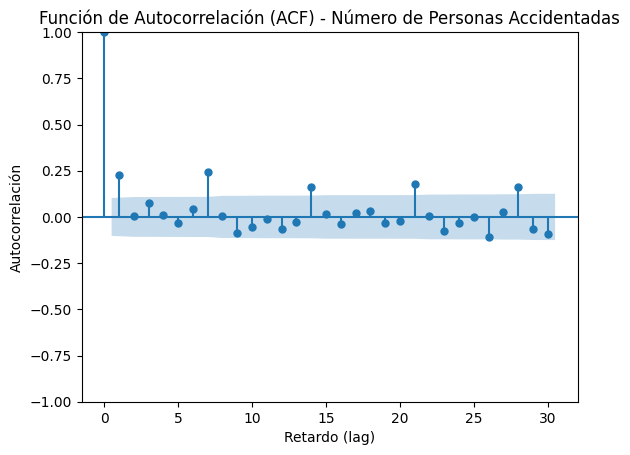

In [119]:
# Gráfico de la autocorrelación (ACF)
plt.figure(figsize=(10, 5))
plot_acf(df_fecha_agg['Personas_accidentadas_por_dia'], lags=30)
plt.title("Función de Autocorrelación (ACF) - Número de Personas Accidentadas")
plt.xlabel("Retardo (lag)")
plt.ylabel("Autocorrelación")
plt.show()

**Análisis de Autocorrelación (ACF)**

La función de autocorrelación (ACF) permite evaluar la dependencia temporal de la serie, es decir, el grado en que los valores actuales están relacionados con observaciones pasadas.

**Retardo 1 (lag 1):**
Se observa una autocorrelación aproximada del 24%, lo que indica una dependencia temporal moderada de corto plazo. Esto sugiere que el número de personas accidentadas en un día tiende a estar parcialmente relacionado con el valor observado el día anterior, evidenciando persistencia temporal en la serie.

**Retardo 7 (lag 7):**
Se identifica una autocorrelación cercana al 25% en el séptimo rezago. Este resultado refuerza la presencia de un componente estacional semanal previamente detectado, ya que los valores tienden a correlacionarse con los observados exactamente una semana antes.

**Retardos 21 y 28:**
Se observan autocorrelaciones cercanas al 20% en los rezagos 21 y 28. Estos valores pueden asociarse a ciclos temporales de múltiples semanas (tres y cuatro semanas, respectivamente), lo cual sugiere una estructura periódica más amplia. Sin embargo, la magnitud de la correlación es menor que en los primeros rezagos, lo que indica que la dependencia se debilita conforme aumenta el retardo.

En conjunto, la ACF evidencia que la serie no se comporta como ruido blanco, sino que presenta dependencia temporal significativa, especialmente en el corto plazo y en intervalos semanales.

<Figure size 1000x500 with 0 Axes>

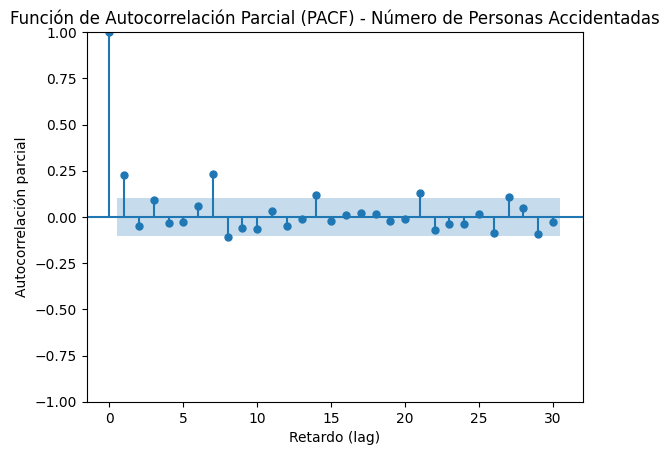

In [120]:
# Gráfico de la autocorrelación parcial (PACF)
plt.figure(figsize=(10, 5))
plot_pacf(df_fecha_agg['Personas_accidentadas_por_dia'], lags=30, method='ywm')
plt.title("Función de Autocorrelación Parcial (PACF) - Número de Personas Accidentadas")
plt.xlabel("Retardo (lag)")
plt.ylabel("Autocorrelación parcial")
plt.show()

**Análisis de Autocorrelación Parcial (PACF)**

La Función de Autocorrelación Parcial (PACF) permite identificar la relación directa entre un rezago específico y el valor actual de la serie, controlando el efecto de los rezagos intermedios.

**Rezago 1 (lag 1):**
Se observa una autocorrelación parcial cercana a 0.24, consistente con lo evidenciado en la ACF. Esto indica que el número de personas accidentadas en un día mantiene una relación directa y significativa con el valor del día anterior, sugiriendo la presencia de un componente autorregresivo de corto plazo.

**Rezago 7 (lag 7):**
La PACF muestra una correlación significativa cercana al 25% en el séptimo rezago. Este resultado confirma una influencia directa entre el número de personas accidentadas y el valor observado exactamente una semana antes, lo cual refuerza la evidencia de estacionalidad semanal detectada previamente.

**Múltiplos de 7 (14, 21 y 28 días):**
Se identifican picos significativos en los múltiplos de 7 días, lo que sugiere una estructura periódica consistente. La diferencia observada entre ACF y PACF en los retardos 27 y 28 días puede explicarse porque la ACF captura efectos acumulativos indirectos, mientras que la PACF aísla únicamente la influencia directa de cada rezago específico.

En conjunto, los resultados del PACF sugieren la presencia de componentes autorregresivos tanto de corto plazo (lag 1) como estacionales (lag 7 y múltiplos), lo que indica que la serie presenta dependencia temporal estructurada y no corresponde a un proceso puramente aleatorio.

###5.6 Detección de Anomalías y Picos

Las funciones utilizadas secuencialmente para analizar las Anomalias y picos son:



*   mean(): Calcula los medios de la serie para establecer un punto central.
*   std(): Calcula la desviación estándar , que se utiliza para definir los umbrales de anomalías.

*   Operadores lógicos ( >y <): Identifican anomalías y picos comparando los valores con los umbrales definidos.
*   plt.scatter: Resalta los días con anomalías y picos en el gráfico principal.





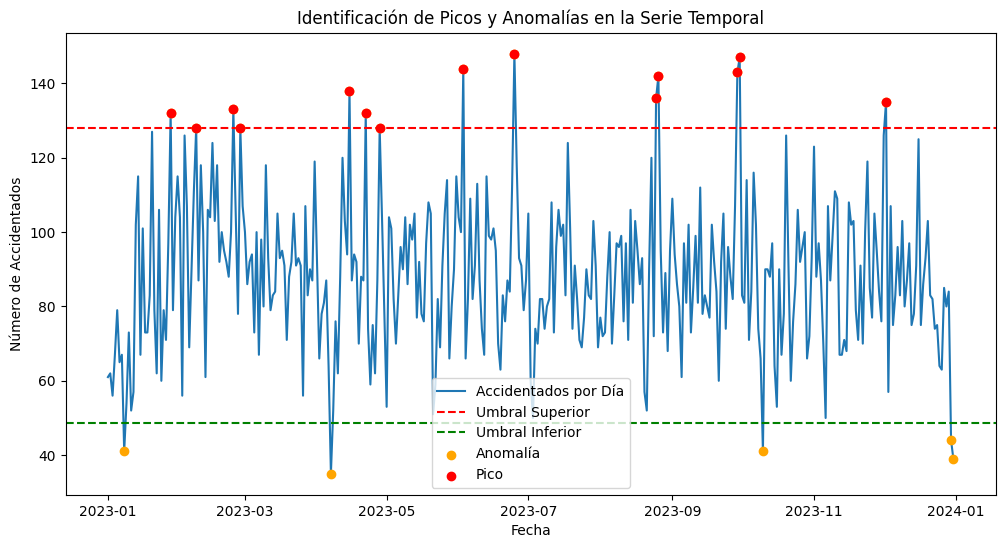

In [121]:
# Calcular la media y desviación estándar de la serie
media = df_fecha_agg['Personas_accidentadas_por_dia'].mean()
desviacion_estandar = df_fecha_agg['Personas_accidentadas_por_dia'].std()

# Definir umbral para anomalías,  más allá de 2 desviaciones estándar
umbral_alto = media + 2 * desviacion_estandar
umbral_bajo = media - 2 * desviacion_estandar

# Identificar anomalías
df_fecha_agg['anomalía'] = (df_fecha_agg['Personas_accidentadas_por_dia'] > umbral_alto) | (df_fecha_agg['Personas_accidentadas_por_dia'] < umbral_bajo)

# Identificar picos específicamente (valores mucho más altos que el promedio)
df_fecha_agg['pico'] = df_fecha_agg['Personas_accidentadas_por_dia'] > umbral_alto

# Graficar la serie temporal, mostrando los picos y anomalías
plt.figure(figsize=(12, 6))
plt.plot(df_fecha_agg.index, df_fecha_agg['Personas_accidentadas_por_dia'], label='Accidentados por Día')
plt.axhline(y=umbral_alto, color='r', linestyle='--', label='Umbral Superior')
plt.axhline(y=umbral_bajo, color='g', linestyle='--', label='Umbral Inferior')

# Marcar picos y anomalías
plt.scatter(df_fecha_agg.index[df_fecha_agg['anomalía']], df_fecha_agg['Personas_accidentadas_por_dia'][df_fecha_agg['anomalía']], color='orange', label='Anomalía', zorder=5)
plt.scatter(df_fecha_agg.index[df_fecha_agg['pico']], df_fecha_agg['Personas_accidentadas_por_dia'][df_fecha_agg['pico']], color='red', label='Pico', zorder=5)

plt.title('Identificación de Picos y Anomalías en la Serie Temporal')
plt.xlabel('Fecha')
plt.ylabel('Número de Accidentados')
plt.legend()
plt.show()

In [122]:
df_fecha_agg[df_fecha_agg['pico']==True]

,Personas_accidentadas_por_dia,anomalía,pico
Fecha_Acc,,,
2023-01-28,132,True,True
2023-02-08,128,True,True
2023-02-24,133,True,True
2023-02-27,128,True,True
2023-04-15,138,True,True
2023-04-22,132,True,True
2023-04-28,128,True,True
2023-06-03,144,True,True
2023-06-25,148,True,True


In [123]:
df_fecha_agg['Personas_accidentadas_por_dia'][df_fecha_agg['anomalía']]

,Personas_accidentadas_por_dia
Fecha_Acc,
2023-01-08,41
2023-01-28,132
2023-02-08,128
2023-02-24,133
2023-02-27,128
2023-04-07,35
2023-04-15,138
2023-04-22,132
2023-04-28,128


**Análisis de Anomalías y Valores Atípicos**

El análisis de la serie permitió identificar 19 observaciones que se encuentran fuera del comportamiento habitual, según el criterio estadístico utilizado (por ejemplo, IQR o desviaciones estándar).

De estos:

5 días presentan valores inusualmente bajos, destacándose el 7 de abril con 35 personas accidentadas.

14 días muestran picos elevados, sobresaliendo el 25 de junio con 148 personas accidentadas.

La mayoría de estos valores extremos coinciden temporalmente con fines de semana, festivos o periodos de alta movilidad, lo que es consistente con el patrón de estacionalidad semanal previamente identificado.

No obstante, aunque existe coincidencia temporal con estos periodos, para atribuir causalidad sería necesario incorporar variables adicionales como volumen de tráfico, eventos masivos o condiciones climáticas.

En términos estadísticos, la presencia de estos valores atípicos confirma que la serie presenta episodios de alta variabilidad y eventos extremos, lo cual puede afectar la estabilidad del modelo si no se tratan adecuadamente en fases posteriores de modelamiento.

Dado que la serie no sigue una distribución normal estricta, el criterio de ±2 desviaciones estándar debe interpretarse como una aproximación descriptiva y no como un umbral probabilístico exacto.

##6. Conclusiones Generales

El análisis exploratorio de los datos de accidentalidad vial en Bogotá permite identificar patrones estructurales, demográficos y temporales relevantes para la comprensión del fenómeno:

📍**1. Concentración territorial**

Los accidentes se encuentran altamente concentrados en un número reducido de localidades. Cinco localidades representan cerca del 47% del total de personas accidentadas, lo que sugiere posibles zonas críticas asociadas a alta densidad vehicular, infraestructura vial compleja o mayor exposición al riesgo.

🚗 **2. Tipología del accidente**

El tipo de accidente predominante es el choque, que representa aproximadamente el 74% de los casos. Esto indica que la mayoría de los eventos corresponden a colisiones entre vehículos, más que a atropellos o volcamientos.

🏍**3. Tipo de actor vial**

El 83% de las personas accidentadas estaban asociadas a vehículos motorizados, especialmente motocicletas y automóviles. Esto evidencia que la mayor carga del riesgo recae sobre conductores y acompañantes de estos vehículos.

👤 **4. Perfil demográfico**

Se observa una clara predominancia masculina (aproximadamente 74%) en las personas accidentadas.
En términos de edad, la distribución muestra mayor concentración en población joven-adulta, con un rango intercuartílico aproximado entre 25 y 46 años, lo que sugiere que la población económicamente activa es la más expuesta al riesgo vial.

📈 **5. Comportamiento estadístico de la variable**

La distribución diaria de personas accidentadas presenta:

Asimetría positiva (sesgo hacia valores altos).

Presencia de valores atípicos.

No normalidad confirmada mediante pruebas estadísticas.

Alta variabilidad diaria (desviación estándar significativa).

Esto indica que la serie presenta fluctuaciones importantes y eventos extremos que afectan su comportamiento.

📅 **6. Estacionalidad y dependencia temporal**

El análisis de la serie de tiempo muestra:

Autocorrelación significativa en el retardo de 1 día, lo que indica dependencia entre días consecutivos.

Autocorrelación relevante en múltiplos de 7 días, confirmando una estacionalidad semanal.

Mayor número de accidentes los viernes y sábados.

Reducción significativa los domingos.

Estos patrones sugieren que factores asociados a movilidad de fin de semana y comportamiento social influyen en la dinámica de accidentalidad.

⚠ **7. Detección de anomalías**

Se identificaron 19 días con valores atípicos, incluyendo picos elevados y días inusualmente bajos. Gran parte de estos eventos coinciden con fines de semana, festivos o periodos vacacionales, lo que refuerza la influencia de factores estacionales y contextuales sobre la accidentalidad.


🎯 **Conclusión Integrada**

El fenómeno de accidentalidad vial analizado no presenta un comportamiento aleatorio, sino que muestra:


*   Concentración geográfica
*   Perfil demográfico definido
*   Alta variabilidad
*   Dependencia temporal
*   Estacionalidad semanal clara

Estos hallazgos sugieren que la accidentalidad está influenciada por patrones estructurales de movilidad urbana y comportamiento social, lo que abre la puerta a futuros modelos predictivos que incorporen componentes estacionales y autorregresivos.